### Boosting

Freud & Schapire in 1995 introduced the concept of boosting with the well know AdaBoost algorithm. The core concept of boosting is that rather than a independent individual hypothesis, combining hypothesis in a sequential order increases the accuracy. Essentially, boosting algorithms convert the weak learners into strong learners. Boosting algorithms are well designed to address the bias problems.

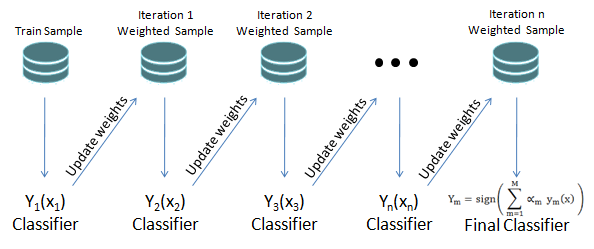

In [2]:
from IPython.display import Image
Image(filename='../Chapter 4 Figures/Boosting.png', width=500)

### AdaBoosting

In [13]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Bagged Decision Trees for Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# read the data in
df = pd.read_csv("Data/Diabetes.csv")

# Let's use some week features to build the tree
X = df[['age','serum_insulin']] # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=5, random_state=2017)
num_trees = 100

# Dection Tree with 5 fold cross validation
# lets restrict max_depth to 1 to have more impure leaves
clf_DT = DecisionTreeClassifier(max_depth=1, random_state=2017).fit(X_train,y_train)
results = cross_validation.cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print "Decision Tree (stand alone) - CV Train : %.2f" % results.mean()
print "Decision Tree (stand alone) - Test : %.2f" % metrics.accuracy_score(clf_DT.predict(X_train), y_train)
print "Decision Tree (stand alone) - Test : %.2f" % metrics.accuracy_score(clf_DT.predict(X_test), y_test)

# Using Adaptive Boosting of 100 iteration
clf_DT_Boost = AdaBoostClassifier(base_estimator=clf_DT, n_estimators=num_trees, learning_rate=0.1, random_state=2017).fit(X_train,y_train)
results = cross_validation.cross_val_score(clf_DT_Boost, X_train, y_train, cv=kfold)
print "\nDecision Tree (AdaBoosting) - CV Train : %.2f" % results.mean()
print "Decision Tree (AdaBoosting) - Train : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_train), y_train)
print "Decision Tree (AdaBoosting) - Test : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_test), y_test)

Decision Tree (stand alone) - CV Train : 0.64
Decision Tree (stand alone) - Test : 0.66
Decision Tree (stand alone) - Test : 0.65

Decision Tree (AdaBoosting) - CV Train : 0.69
Decision Tree (AdaBoosting) - Train : 0.72
Decision Tree (AdaBoosting) - Test : 0.71


### Gradient Boosting

Due to the stage wise addictivity, the loss function can be represented in a form suitable for optimization. This gave birth to a class of generalized boosting algorithms known as generalized boosting algorithm (GBM). Gradient boosting is an example implementation of GBM and it can work with different loss functions such as regression, classification, risk modelling etc. As the name suggested it is a boosting algorithm which identifies shortcomings of a weak learner by gradients (AdaBoost uses high-weight data points), hence the name Gradient Boosting. 

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Using Gradient Boosting of 100 iterations
clf_GBT = GradientBoostingClassifier(n_estimators=num_trees, learning_rate=0.1, random_state=2017).fit(X_train, y_train)
results = cross_validation.cross_val_score(clf_GBT, X_train, y_train, cv=kfold)

print "\nGradient Boosting - CV Train : %.2f" % results.mean()
print "Gradient Boosting - Train : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_train), y_train)
print "Gradient Boosting - Test : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_test), y_test)


Gradient Boosting - CV Train : 0.70
Gradient Boosting - Train : 0.81
Gradient Boosting - Test : 0.66


### XGBoost (eXtreme Gradient Boosting)

In March 2014, Tianqui Chen built xgboost in C++ as part of Distributed (Deep) Machine Learning Community, and it has interface for Python. It is an extended, more regularized version of gradient boosting algorithm. This is one of the most well performing large-scale, scalable machine learning algorithms which has been playing a major role in winning solutions of Kaggle (forum for predictive modelling and analytics competition) data science competition.

sklearn has a wrapper for xgboost (XGBClassifier).

In [15]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


# read the data in
df = pd.read_csv("Data/Diabetes.csv")

predictors = ['age','serum_insulin']
target = 'class'

# Most common preprocessing step include label encoding and missing value treatment
from sklearn import preprocessing 
for f in df.columns: 
    if df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))

df.fillna((-999), inplace=True) 

# Let's use some week features to build the tree
X = df[['age','serum_insulin']] # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)
num_rounds = 100

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=5, random_state=2017)

clf_XGB = XGBClassifier(n_estimators = num_rounds, 
                        objective= 'binary:logistic',
                        seed=2017)

# use early_stopping_rounds to stop the cv when there is no score imporovement
clf_XGB.fit(X_train,y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)

results = cross_validation.cross_val_score(clf_XGB, X_train,y_train, cv=kfold)
print "\nxgBoost - CV Train : %.2f" % results.mean()
print "xgBoost - Train : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_train), y_train)
print "xgBoost - Test : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_test), y_test)


xgBoost - CV Train : 0.69
xgBoost - Train : 0.75
xgBoost - Test : 0.69


### XGBoost using native interface

DMatrix - xgboost has its own internal data structure DMatrix for input data. It is good practice to convert large dataset to DMatrix object to save preprocessing time.

In [16]:
xgtrain = xgb.DMatrix(X_train, label=y_train, missing=-999)
xgtest = xgb.DMatrix(X_test, label=y_test, missing=-999)

# set xgboost params
param = {'max_depth': 3,  # the maximum depth of each tree
         'objective': 'binary:logistic'}

clf_xgb_cv = xgb.cv(param, xgtrain, num_rounds, 
                    stratified=True, 
                    nfold=5, 
                    early_stopping_rounds=20, 
                    seed=2017)

print ("Optimal number of trees/estimators is %i" % clf_xgb_cv.shape[0])

watchlist  = [(xgtest,'test'), (xgtrain,'train')]                
clf_xgb = xgb.train(param, xgtrain,clf_xgb_cv.shape[0], watchlist)

# predict function will produce the probability 
# so we'll use 0.5 cutoff to convert probability to class label
y_train_pred = (clf_xgb.predict(xgtrain, ntree_limit=clf_xgb.best_iteration) > 0.5).astype(int)
y_test_pred = (clf_xgb.predict(xgtest, ntree_limit=clf_xgb.best_iteration) > 0.5).astype(int)

print "XGB - Train : %.2f" % metrics.accuracy_score(y_train_pred, y_train)
print "XGB - Test : %.2f" % metrics.accuracy_score(y_test_pred, y_test)

Optimal number of trees/estimators is 7
[0]	test-error:0.344156	train-error:0.299674
[1]	test-error:0.324675	train-error:0.273616
[2]	test-error:0.272727	train-error:0.281759
[3]	test-error:0.266234	train-error:0.278502
[4]	test-error:0.266234	train-error:0.273616
[5]	test-error:0.311688	train-error:0.254072
[6]	test-error:0.318182	train-error:0.254072
XGB - Train : 0.75
XGB - Test : 0.69


### How does the decision boudary look?

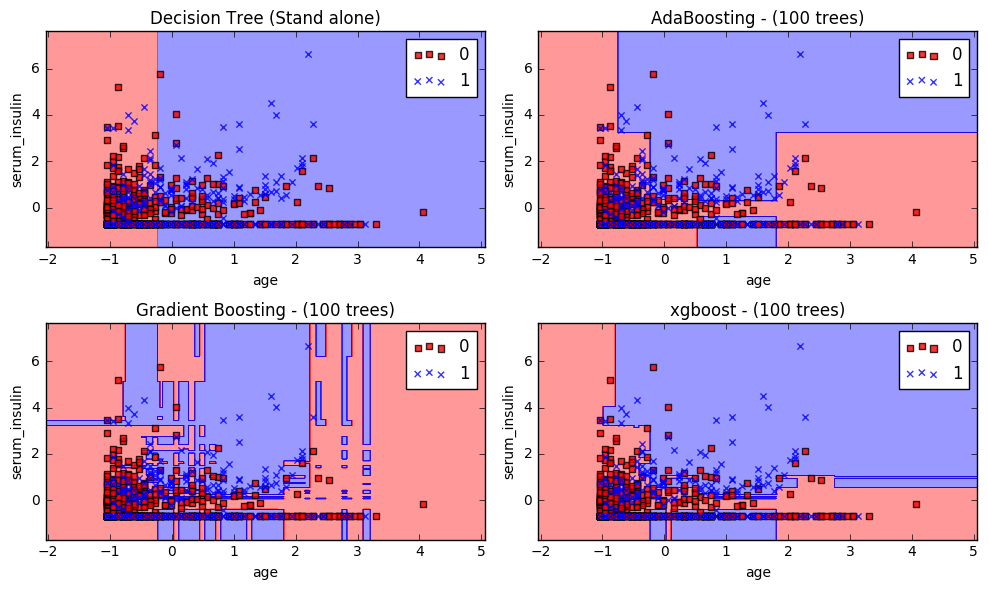

In [17]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.subplot(221)
plot_decision_regions(X, y, clf_DT)
plt.title('Decision Tree (Stand alone)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')

plt.subplot(222)
plot_decision_regions(X, y, clf_DT_Boost)
plt.title('AdaBoosting - (100 trees)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')

plt.subplot(223)
plot_decision_regions(X, y, clf_GBT)
plt.title('Gradient Boosting - (100 trees)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')

plt.subplot(224)
plot_decision_regions(X, y, clf_XGB)
plt.title('xgboost - (100 trees)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')
plt.tight_layout()

### Digit classification with Gradient Boosting

Let's look at the digit classification to illustrate how the model performance improves with each iteration


Gradient Boosting - Train : 0.75
Gradient Boosting - Test : 0.73
Predicted letter:  ['T']


/home/manohar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/manohar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/manohar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

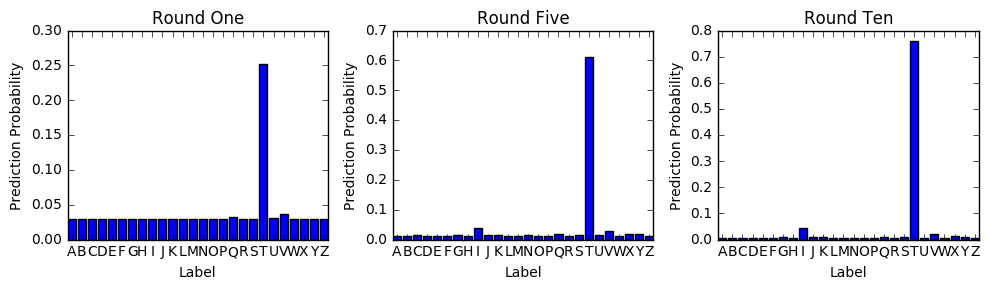

In [18]:
df= pd.read_csv('Data/digit.csv')

X = df.ix[:,1:17].values
y = df['lettr'].values   

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=5, random_state=2017)
num_trees = 10

clf_GBT = GradientBoostingClassifier(n_estimators=num_trees, learning_rate=0.1, random_state=2017).fit(X_train, y_train)
results = cross_validation.cross_val_score(clf_GBT, X_train, y_train, cv=kfold)

print "\nGradient Boosting - Train : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_train), y_train)
print "Gradient Boosting - Test : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_test), y_test)

# Let's predict for the letter 'T' and understand how the prediction accuracy changes in each boosting iteration
X_valid= (2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8)
print "Predicted letter: ", clf_GBT.predict(X_valid)

# Staged prediction will give the predicted probability for each boosting iteration
stage_preds = list(clf_GBT.staged_predict_proba(X_valid))
final_preds = clf_GBT.predict_proba(X_valid)

# Plot 
x = range(1,27)
label = np.unique(df['lettr'])

plt.figure(figsize=(10,3))
plt.subplot(131)    
plt.bar(x, stage_preds[0][0], align='center')
plt.xticks(x, label)
plt.xlabel('Label')
plt.ylabel('Prediction Probability')
plt.title('Round One')
plt.autoscale() 

plt.subplot(132)
plt.bar(x, stage_preds[5][0],align='center')  
plt.xticks(x, label)
plt.xlabel('Label')
plt.ylabel('Prediction Probability')
plt.title('Round Five')
plt.autoscale() 

plt.subplot(133)
plt.bar(x, stage_preds[9][0],align='center')    
plt.xticks(x, label)
plt.autoscale() 
plt.xlabel('Label')
plt.ylabel('Prediction Probability')
plt.title('Round Ten')

plt.tight_layout()
plt.show()

Notice that the model is more confident with each iteration on the predicted probability for the letter T, whereas its the opposite for other letters.